In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

# Get the current directory
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
print(parent_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

from load_data import load_data_using_sqlalchemy
from scripts.telecom_analysis_EDA import TelecomEDA


c:\Users\HP\Documents\10-Academy\Telecom-WEEK2\notebooks
c:\Users\HP\Documents\10-Academy\Telecom-WEEK2


In [2]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")

Successfully loaded the data


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Initialize the analysis
analysis = TelecomEDA(df)

In [5]:
# Handling missing values and outliers
analysis.handle_missing_values()
analysis.handle_outliers()

In [6]:
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [7]:
# Variable Transformation
decile_summary = analysis.variable_transformation()
print(decile_summary)

   Decile  Total_Duration
0       0    2.681878e+08
1       1    1.011013e+09
2       2    1.799874e+09
3       3    7.025099e+09
4       4    1.348095e+11


c:\Users\HP\Documents\10-Academy\Telecom-WEEK2\scripts\telecom_analysis_EDA.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.loc[:, 'Total_Duration'] = self.df['Activity Duration DL (ms)'] + self.df['Activity Duration UL (ms)']
c:\Users\HP\Documents\10-Academy\Telecom-WEEK2\scripts\telecom_analysis_EDA.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.loc[:, 'Decile'] = pd.qcut(self.df['Total_Duration'], 5, labels=False)


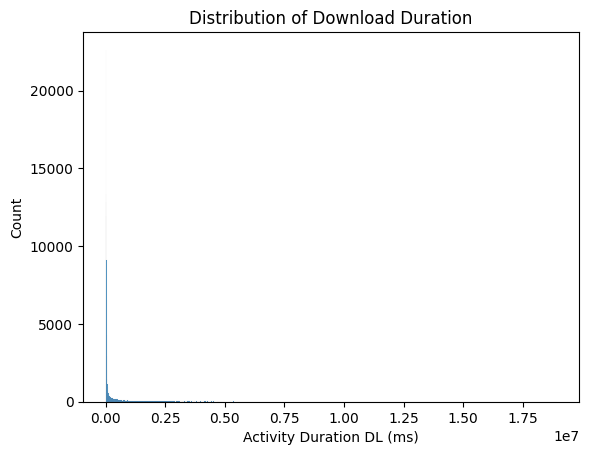

C:\Users\HP\AppData\Local\Temp\ipykernel_24628\2835119293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis.df['Total_Duration'] = analysis.df['Activity Duration DL (ms)'] + analysis.df['Activity Duration UL (ms)']


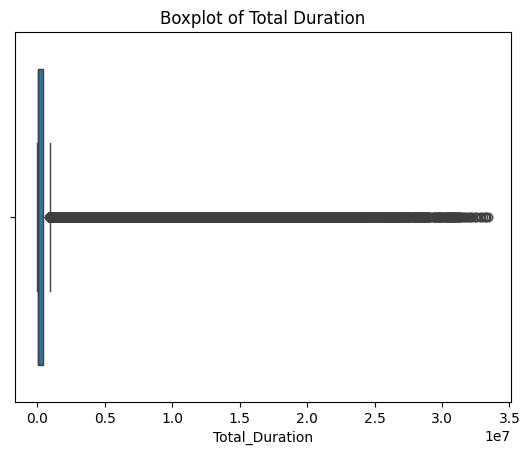

In [8]:
# Plotting Univariate Analysis
sns.histplot(analysis.df['Activity Duration DL (ms)'])
plt.title('Distribution of Download Duration')
plt.show()

# Calculate Total Duration if not already done
analysis.df['Total_Duration'] = analysis.df['Activity Duration DL (ms)'] + analysis.df['Activity Duration UL (ms)']

# Plot Total Duration
sns.boxplot(x=analysis.df['Total_Duration'])
plt.title('Boxplot of Total Duration')
plt.show()

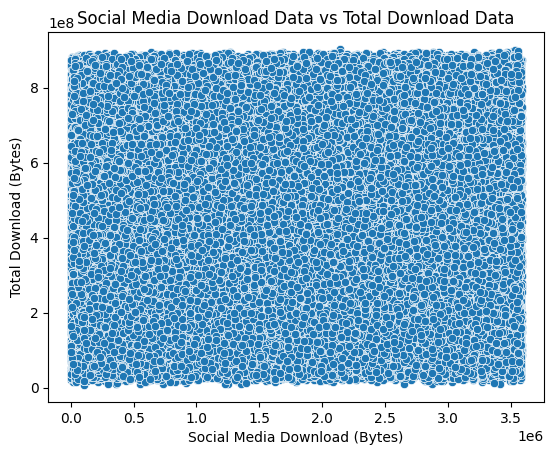

In [9]:
# Bivariate Analysis
sns.scatterplot(x='Social Media DL (Bytes)', y='Total DL (Bytes)', data=analysis.df)
plt.title('Social Media Download Data vs Total Download Data')
plt.xlabel('Social Media Download (Bytes)')
plt.ylabel('Total Download (Bytes)')
plt.show()


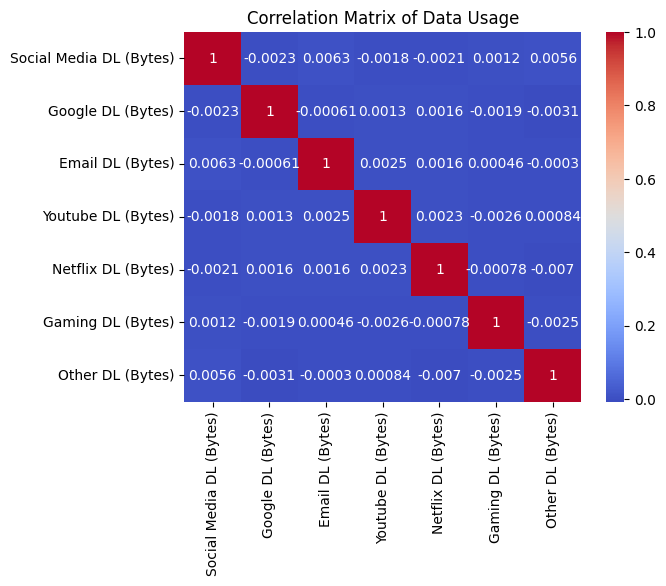

In [10]:
# Correlation Matrix
correlation_matrix = analysis.correlation_analysis()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Data Usage')
plt.show()

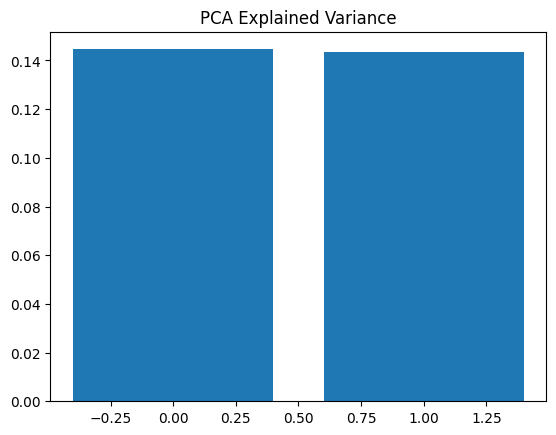

In [11]:
# PCA Visualization
principal_components = analysis.perform_pca()
plt.bar(range(len(principal_components)), principal_components)
plt.title('PCA Explained Variance')
plt.show()

 to identify the Top 10 Handsets Used by Customers

In [12]:
# Identify the top 10 handsets used by customers
top_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets Used by Customers:")
print(top_handsets)

Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


Identify the Top 3 Handset Manufacturers

In [13]:
# Identify the top 3 handset manufacturers
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:")
print(top_manufacturers)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


 Identify the Top 5 Handsets per Top 3 Handset Manufacturer

In [14]:
# Get the top 3 manufacturers
top_manufacturers_list = top_manufacturers.index

# Filter dataset for these manufacturers
filtered_df = df[df['Handset Manufacturer'].isin(top_manufacturers_list)]

# Identify the top 5 handsets per top 3 manufacturer
top_handsets_per_manufacturer = (
    filtered_df.groupby('Handset Manufacturer')['Handset Type']
    .value_counts()
    .groupby(level=0).head(5)
)
print("Top 5 Handsets per Top 3 Handset Manufacturer:")
print(top_handsets_per_manufacturer)

Top 5 Handsets per Top 3 Handset Manufacturer:
Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Ga

Interpretation
Top Handsets Overview:

Huawei B528S-23A is the most popular handset, with significantly higher usage compared to others.
Several Apple iPhone models are also popular, with the iPhone 6S, iPhone 6, and iPhone 7 leading in usage.
undefined is a prominent entry, which may suggest data quality issues or missing information that needs to be addressed.
Top Manufacturers:

Apple leads with the highest number of handsets in use, indicating strong customer loyalty and a significant market presence.
Samsung and Huawei follow, with Samsung showing strong performance and Huawei also having a notable presence.
Top Handsets per Manufacturer:

Apple: Dominates with multiple models in the top rankings, including older models like the iPhone 6S and iPhone 6, indicating lasting customer preference for Apple’s devices.
Huawei: The Huawei B528S-23A stands out as a leading handset, with other models trailing significantly in usage.
Samsung: Shows a range of models, with the Galaxy S8 being the top performer, and other models like Galaxy A5 and Galaxy J5 also being popular.


Recommendations
Marketing Strategy:

Focus on Popular Models: Invest in marketing campaigns for the top handsets such as the Huawei B528S-23A and the Apple iPhone series. Tailor promotions and advertisements to highlight the features of these popular models.
Address Data Quality: Investigate and rectify the undefined entries in your dataset to ensure accurate reporting and marketing strategies.
Retail Strategy:

Stock Management: Ensure high availability of top models like the Huawei B528S-23A and popular Apple iPhone models in retail stores to meet customer demand.
Product Placement: Place these top handsets prominently in stores and online platforms to capture attention and drive sales.
Customer Engagement:

Exclusive Offers: Consider offering exclusive deals or bundles for top handsets, especially those from Apple and Huawei, to attract more customers.
Feedback Collection: Gather customer feedback on these popular models to understand user preferences and areas for improvement.
Manufacturer Collaboration:

Partnerships: Strengthen relationships with top manufacturers like Apple, Samsung, and Huawei. Explore opportunities for collaborative marketing or exclusive product launches.